# Data Science and Business Analytics  Internship At Sparks Foundation
   
   
  

##### Task-1 Prediction Using Supervised Learning
     In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


###### By Maumita Das

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To ignore warnings
import warnings as wg

In [4]:
# Reading data from remote link

ds = "http://bit.ly/w-data"
s_data = pd.read_csv(ds)
print("Data imported successfully")
s_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
s_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
s_data.shape

(25, 2)

In [7]:
s_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
s_data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


###### Data Visualization

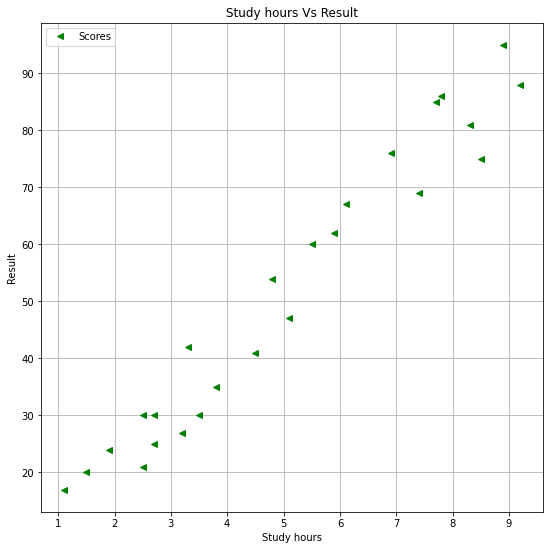

In [16]:
plt.rcParams['figure.figsize'] = (9, 9)
s_data.plot(x='Hours', y='Scores',style='<',color='g')
plt.title('Study hours Vs Result')
plt.xlabel('Study hours')
plt.ylabel('Result')
plt.grid()
plt.show()

#####  From shown above graph , we can clearly state that there is positive relationship between Hours studied and Percentage of Score.

In [18]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##### Preparing Data

In [39]:
#using iloc function we will divide data
X = s_data.iloc[ : , :-1].values
y = s_data.iloc[:, 1].values 

In [40]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [41]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

##### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [49]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) 


LinearRegression()

## Visualizing the model

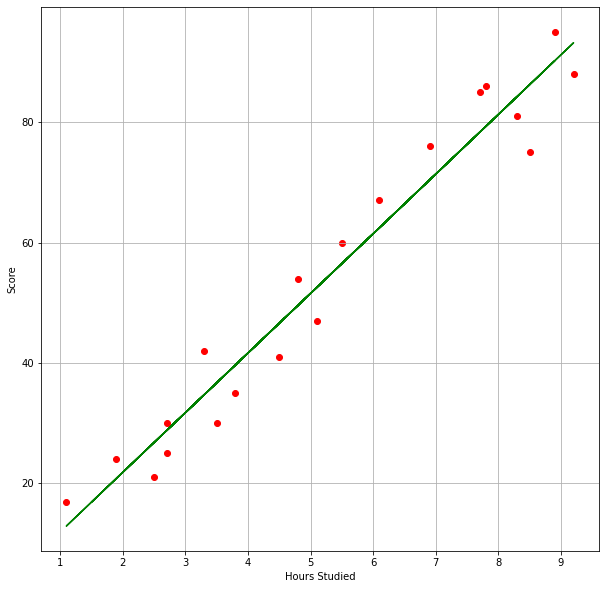

In [55]:
line = model.coef_ * X + model.intercept_
#Plotting the training data
plt.rcParams['figure.figsize'] = [10,10]
plt.scatter(X_train , y_train,color = 'red')
plt.plot(X,line,color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.grid()
plt.show()

# Making Predictions
Now we have trained our algorithm, now its time to train our algorithm

In [58]:
print(X_test) # Testing data in hours
y_pred = model.predict(X_test) # Predicting in scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [57]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [59]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [64]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = ",hours)
print("Predicted Score = ",own_pred[0])

No of Hours =  9.25
Predicted Score =  93.69173248737538


### Evaluating Model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.


In [65]:
from sklearn import metrics
print("Mean error:", metrics.mean_absolute_error(y_test,y_pred))

Mean error: 4.183859899002975
